In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [4]:
train_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [5]:
train = train_data

In [6]:
x_input = train

In [7]:
def fill_null(data):
  for i in data:
    if data[i].dtype == object:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
    else:
      mode = data[i].mode()
      data[i].fillna(mode[0], inplace = True)
  return data
train = fill_null(x_input)
test = fill_null(test_data)

In [ ]:
x_input.info()

In [8]:
# prepare input data
oe = OrdinalEncoder()
def prepare_inputs(X_train, X_test):
  for i in X_train:
    if X_train[i].dtype == object:
      t1 = np.array(X_train[i])
      t1 = t1.reshape(-1,1)
      oe.fit(t1)
      t2 = oe.transform(t1)
      t2= t2.reshape(-1)
      train[i] = t2
  for i in X_test:
    if X_test[i].dtype == object:
      t1 = np.array(X_test[i])
      t1 = t1.reshape(-1,1)
      oe.fit(t1)
      t2 = oe.transform(t1)
      t2= t2.reshape(-1)
      test[i] = t2
	#oe = OrdinalEncoder()
	#oe.fit(X_train)
	#X_train_enc = oe.transform(X_train)
	#X_test_enc = oe.transform(X_test)
	#return X_train_enc, X_test_enc
prepare_inputs(train,test)
#print(x_input)
#print(test_data)

In [ ]:
test

In [9]:
all_clm = ['LotArea','LotFrontage'] + ['OverallQual','OverallCond'] + ['Exterior1st','Exterior2nd'] + ['BsmtQual','BsmtCond'] + ['BsmtFinType1','BsmtFinType2'] + ['ExterQual','ExterCond'] + ['BsmtFinSF1','BsmtFinSF2'] + ['TotalBsmtSF','BsmtUnfSF'] + ['1stFlrSF','2ndFlrSF'] + ['BsmtFullBath','BsmtHalfBath'] + ['FullBath','HalfBath'] + ['BedroomAbvGr','TotRmsAbvGrd'] + ['GarageQual','GarageCond'] + ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'] + ['YrSold','YearBuilt','MoSold'] + ['Condition1','Condition2']

In [10]:
train['LotWidht'] = train['LotArea']/train['LotFrontage']
test['LotWidht'] = test['LotArea']/test['LotFrontage']
#train = train.drop(['LotArea','LotFrontage'],axis = 1)

train['OverallCondition'] = (train['OverallQual']+train['OverallCond'])/2
test['OverallCondition'] = (test['OverallQual']+test['OverallCond'])/2
#train = train.drop(['OverallQual','OverallCond'],axis = 1)

train.loc[train['Exterior1st'] == train['Exterior2nd'],'TotalExterior'] = 1
train.loc[train['Exterior1st'] != train['Exterior2nd'],'TotalExterior'] = 2
#train['TotalExterior'].describe()
#train = train.drop(['Exterior1st','Exterior2nd'],axis = 1)
test.loc[test['Exterior1st'] == test['Exterior2nd'],'TotalExterior'] = 1
test.loc[test['Exterior1st'] != test['Exterior2nd'],'TotalExterior'] = 2

train['BstmCondition'] = (train['BsmtQual']+train['BsmtCond'])/2
test['BstmCondition'] = (test['BsmtQual']+test['BsmtCond'])/2
#train = train.drop(['BsmtQual','BsmtCond'],axis = 1)

train['AvgRatFinArea'] = (train['BsmtFinType1']+train['BsmtFinType2'])/2
test['AvgRatFinArea'] = (test['BsmtFinType1']+test['BsmtFinType2'])/2
#train = train.drop(['BsmtFinType1','BsmtFinType2'],axis = 1)

train['ExterCondition'] = (train['ExterQual']+train['ExterCond'])/2
test['ExterCondition'] = (test['ExterQual']+test['ExterCond'])/2
#train = train.drop(['ExterQual','ExterCond'],axis = 1)

train['TotalFinArea'] = (train['BsmtFinSF1']+train['BsmtFinSF2'])
test['TotalFinArea'] = (test['BsmtFinSF1']+test['BsmtFinSF2'])
#train = train.drop(['BsmtFinSF1','BsmtFinSF2'],axis = 1)

train['CompleteBsmtSF'] = (train['TotalBsmtSF']-train['BsmtUnfSF'])
test['CompleteBsmtSF'] = (test['TotalBsmtSF']-test['BsmtUnfSF'])
#train = train.drop(['TotalBsmtSF','BsmtUnfSF'],axis = 1)

train['TotalFlrSF'] = (train['1stFlrSF']+train['2ndFlrSF'])
test['TotalFlrSF'] = (test['1stFlrSF']+test['2ndFlrSF'])
#train = train.drop(['1stFlrSF','2ndFlrSF'],axis = 1)

train['TotalBath'] = (train['BsmtFullBath']+train['BsmtHalfBath'])
test['TotalBath'] = (test['BsmtFullBath']+test['BsmtHalfBath'])
#train = train.drop(['BsmtFullBath','BsmtHalfBath'],axis = 1)

train['TotalBath1'] = (train['FullBath']+train['HalfBath'])
test['TotalBath1'] = (test['FullBath']+test['HalfBath'])
#train = train.drop(['FullBath','HalfBath'],axis = 1)

train['TotalRoom'] = (train['BedroomAbvGr']+train['TotRmsAbvGrd']) 
test['TotalRoom'] = (test['BedroomAbvGr']+test['TotRmsAbvGrd'])
#train = train.drop(['BedroomAbvGr','TotRmsAbvGrd'],axis = 1) 

train['GarageCondition'] = (train['GarageQual']+train['GarageCond'])/2
test['GarageCondition'] = (test['GarageQual']+test['GarageCond'])/2
#train = train.drop(['GarageQual','GarageCond'],axis = 1)

train['TotalPorch'] = (train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch'])
test['TotalPorch'] = (test['OpenPorchSF']+test['EnclosedPorch']+test['3SsnPorch']+test['ScreenPorch'])
#train = train.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis = 1)

train['Day'] = ((train['YrSold'] - train['YearBuilt'])*365)+(train['MoSold']*30)
test['Day'] = ((test['YrSold'] - test['YearBuilt'])*365)+(test['MoSold']*30)
#train = train.drop(['YrSold','YearBuilt','MoSold'],axis = 1)

train.loc[train['Condition1'] == train['Condition2'],'TotalCondition'] = 1
train.loc[train['Condition1'] != train['Condition2'],'TotalCondition'] = 2
#train = train.drop(['Condition1','Condition2'],axis = 1)
test.loc[test['Condition1'] == test['Condition2'],'TotalCondition'] = 1
test.loc[test['Condition1'] != test['Condition2'],'TotalCondition'] = 2

train = train.drop(all_clm,axis = 1)
test = test.drop(all_clm,axis = 1)

In [ ]:
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(train.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

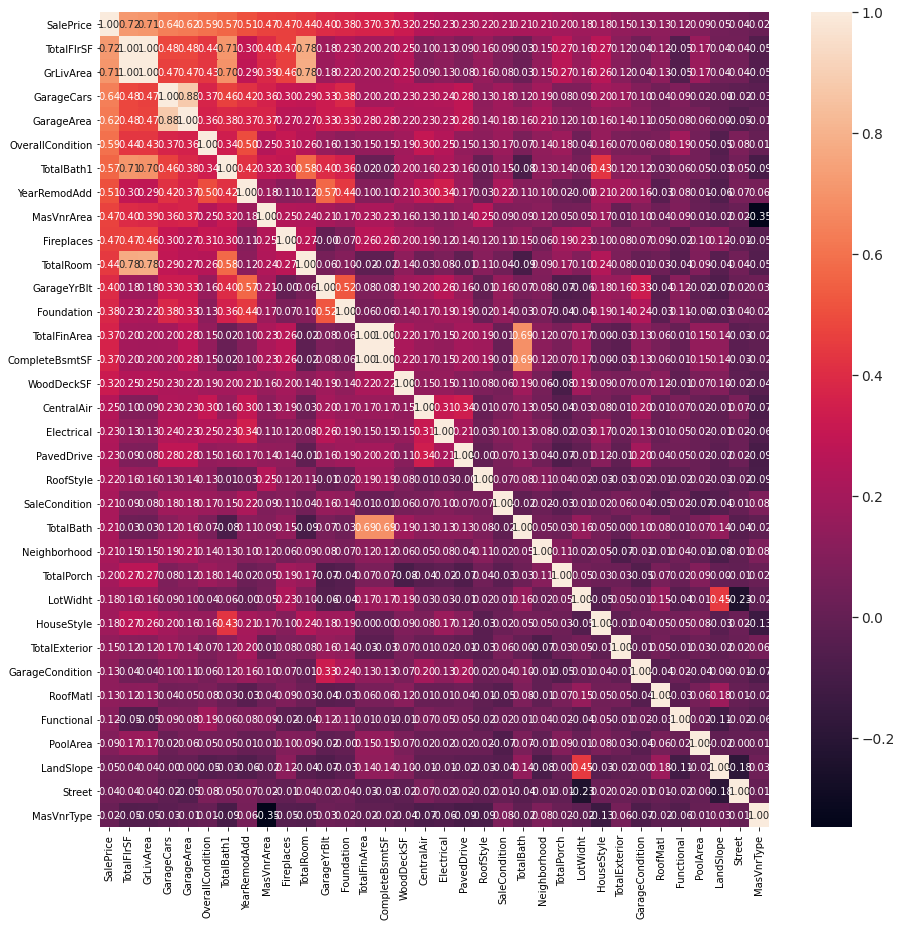

In [15]:
f,ax = plt.subplots(figsize=(15, 15))
corrmat = train.corr()
k =34
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#selected_features = ['SalePrice', 'TotalFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea','OverallCondition', 'TotalBath1', 'YearRemodAdd', 'MasVnrArea','Fireplaces']


In [16]:
#train = train.drop(['GrLivArea','GarageArea'],axis = 1)
train_y = train.filter(cols,axis = 1)
test_y = test.filter(cols,axis = 1)

In [17]:
test_y = test_y.drop(['GrLivArea','GarageArea','TotalRoom','TotalBath1','TotalBath'],axis = 1)#'GrLivArea','GarageArea','TotalRoom','TotalBath1','TotalBath'

In [18]:
train_y = train_y.drop(['GrLivArea','GarageArea','TotalRoom','TotalBath1','TotalBath'],axis = 1)#'GrLivArea','GarageArea','TotalRoom','TotalBath1','TotalBath'

In [ ]:
train_y.shape

(1460, 29)

In [ ]:
# feature selection
def select_features(X, Y, func):
  bestfeatures = SelectKBest(score_func=func, k='all')
  fit = bestfeatures.fit(X,Y)
	#fs = SelectKBest(score_func=func, k='all')
	#fs.fit(X_train, y_train)
	#X_train_fs = fs.transform(X_train)
	#X_test_fs = fs.transform(X_test)
	#return X_train_fs, X_test_fs, fs
  return fit

# feature selection
#X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2)
fit = select_features(train, train['SalePrice'], mutual_info_regression)
#fit = select_features(x_input1, y_input, chi2)
#fit = select_features(x_input1, y_input, f_regression)
# what are scores for the features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
#for i in range(len(fit.scores_)):
	#print('Feature %d: %f' % (x_input1.loc[i], fs.scores_[i]))
# plot the scores
#pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
#pyplot.show()

               Specs     Score
39         SalePrice  5.582583
8       Neighborhood  0.505817
48        TotalFlrSF  0.497920
23         GrLivArea  0.483791
32        GarageArea  0.363050
31        GarageCars  0.358426
41  OverallCondition  0.357845
54               Day  0.327589
25       KitchenQual  0.326139
50        TotalBath1  0.296289


In [ ]:
featureScores.nlargest(60,'Score')

In [ ]:
a = ['TotalFlrSF','TotalBsmtSF','Neighborhood','TotalFlrSF','GrLivArea','TotalBsmtSF','GarageArea','OverallCondition','KitchenQual','Day','TotalBath1','MSSubClass','ExterCondition','FullBath','BstmCondition','GarageYrBlt','GarageFinish','Foundation','Fireplaces','TotalRoom','HeatingQC','TotalFinArea','AvgRatFinArea','GarageType','LotWidht','SalePrice']
len(a)

26

In [ ]:
y = train_y['SalePrice']
train_y = train.drop(['SalePrice'],axis = 1)

In [ ]:
a = [1,2] + [3,4,5]
a

[1, 2, 3, 4, 5]

In [ ]:
rows, cols = train_y.shape
flds = list(train_y.columns)

# Indexing with numbers on a numpy matrix will probably be faster
corr = train_y.corr().values
clm = []
for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] < 0.7:
            #print (flds[i], ' ', flds[j], ' ', corr[i,j])
            clm.append(flds[j])

In [ ]:
clm = np.unique(clm)
clm = list(clm)

In [ ]:
clm

In [ ]:
train_y = train.filter(clm,axis = 1)
test_y = test.filter(clm,axis = 1)

In [ ]:
train_y['SalePrice'] = y

In [ ]:
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(train_y.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [ ]:
train = train.drop(['Neighborhood','KitchenQual','Day','MSSubClass','ExterCondition','BstmCondition','GarageFinish','HeatingQC','GarageType','AvgRatFinArea','LotWidht'],axis = 1)

In [ ]:
test = test.drop(['Neighborhood','KitchenQual','Day','MSSubClass','ExterCondition','BstmCondition','GarageFinish','HeatingQC','GarageType','AvgRatFinArea','LotWidht'],axis = 1)

In [ ]:
train.columns

Index(['TotalFlrSF', 'TotalBsmtSF', 'Neighborhood', 'TotalFlrSF', 'GrLivArea',
       'TotalBsmtSF', 'GarageArea', 'OverallCondition', 'KitchenQual', 'Day',
       'TotalBath1', 'MSSubClass', 'ExterCondition', 'FullBath',
       'BstmCondition', 'GarageYrBlt', 'GarageFinish', 'Foundation',
       'Fireplaces', 'TotalRoom', 'HeatingQC', 'TotalFinArea', 'AvgRatFinArea',
       'GarageType', 'LotWidht', 'SalePrice'],
      dtype='object')

In [19]:
y = train_y['SalePrice']
train = train_y.drop(['SalePrice'],axis = 1)

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
train = min_max_scaler.fit_transform(train)
test = min_max_scaler.fit_transform(test_y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=1)

In [ ]:
regressorTree = DecisionTreeRegressor(random_state = 0)  
regressorTree.fit(X_train, y_train) 
res = regressorTree.score(X_train, y_train)
print(res*100)
y_pred_tree = regressorTree.predict(X_test)
DTRrmse = (mean_squared_error(y_test, y_pred_tree))**0.5
DTRrmse
# 34 features
#99.99891791227729
#34154.51272228431

# 25 features
99.99891791227729
38059.715640624905

99.99891791227729


38059.715640624905

In [ ]:
regressorGB = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=10,
    learning_rate=0.8
)
regressorGB.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressorGB.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
res = regressorGB.score(X_train, y_train)
print(res*100)
y_predGB = regressorGB.predict(X_test)
GBrmse = (mean_squared_error(y_test, y_predGB))**0.5
GBrmse

#98.32619386202857
#32894.028208323754

# 25 features
98.00636885118014
33610.8385170461

97.34389350594196


33610.8385170461

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a**0.5
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

76.96520247016839


32692.370436137197

In [24]:
passref = PassiveAggressiveRegressor(max_iter=10000000,tol=.0001,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a**0.5
rmse

74.9280644625295


34180.95529320547

In [ ]:
pred_y = regressor.predict(test)
pred_y = pred_y.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/regressor_high.csv", index=False)

In [ ]:
train = train.drop(['PoolArea','MiscVal','LowQualFinSF','HeatingQC','WoodDeckSF','MasVnrArea','BldgType','LandSlope','Utilities'],axis = 1)

In [ ]:
train.describe()

MSSubClass     MSZoning  ...           Day  TotalCondition
count  1460.000000  1460.000000  ...   1460.000000     1460.000000
mean     56.897260     3.028767  ...  13529.657534        1.133562
std      42.300571     0.632017  ...  11040.080520        0.340297
min      20.000000     0.000000  ...     30.000000        1.000000
25%      20.000000     3.000000  ...   3002.500000        1.000000
50%      50.000000     3.000000  ...  12955.000000        1.000000
75%      70.000000     3.000000  ...  20040.000000        1.000000
max     190.000000     4.000000  ...  50000.000000        2.000000

[8 rows x 54 columns]

In [ ]:
train = train.drop(['KitchenQual','Day','MSSubClass','ExterCondition','BstmCondition','GarageFinish','HeatingQC','AvgRatFinArea','GarageType'],axis = 1)

In [ ]:
train['Day'].describe()# 7 5

count     1460.000000
mean     13529.657534
std      11040.080520
min         30.000000
25%       3002.500000
50%      12955.000000
75%      20040.000000
max      50000.000000
Name: Day, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


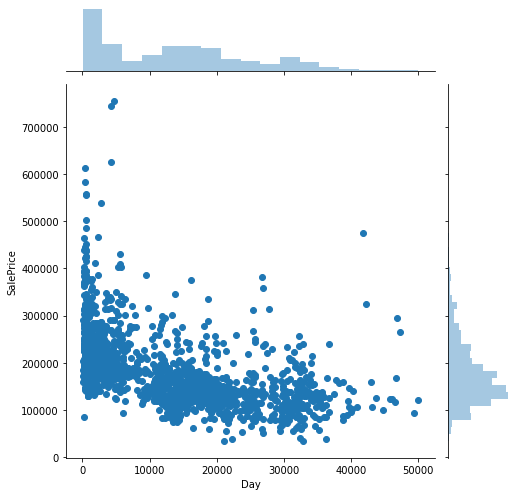

In [ ]:
g = sns.jointplot(train['Day'], train['SalePrice'], kind="scatter", size=7)
plt.savefig('graph.png')
plt.show()

In [ ]:
y = train['SalePrice']
train = train.drop(['SalePrice'],axis = 1)

In [ ]:
train_data

MSSubClass  MSZoning  LotFrontage  ...  SaleCondition  SalePrice    LotWidht
0             60       3.0         65.0  ...            4.0     208500  130.000000
1             20       3.0         80.0  ...            4.0     181500  120.000000
2             60       3.0         68.0  ...            4.0     223500  165.441176
3             70       3.0         60.0  ...            0.0     140000  159.166667
4             60       3.0         84.0  ...            4.0     250000  169.761905
...          ...       ...          ...  ...            ...        ...         ...
1455          60       3.0         62.0  ...            4.0     175000  127.693548
1456          20       3.0         85.0  ...            4.0     210000  155.000000
1457          70       3.0         66.0  ...            4.0     266500  137.000000
1458          20       3.0         68.0  ...            4.0     142125  142.897059
1459          20       3.0         75.0  ...            4.0     147500  132.493333

[1460 rows x 76 columns]